In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df1 = pd.read_csv('train.csv')
df1.drop(columns=['Ticket','Name','Cabin','Fare'], inplace=True)


In [21]:
### Let's perform label encoding on sex column
ordinal_label = {k: i for i, k in enumerate(df1['Sex'].unique(), 0)}
df1['Sex'] = df1['Sex'].map(ordinal_label)

ordinal_label = {k: i for i, k in enumerate(df1['Embarked'].unique(), 0)}
df1['Embarked'] = df1['Embarked'].map(ordinal_label)

df1.dropna(inplace=True)

df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [22]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0
1,2,1,1,1,38.0,1,0,1
2,3,1,3,1,26.0,0,0,0
3,4,1,1,1,35.0,1,0,0
4,5,0,3,0,35.0,0,0,0


In [23]:
X = df1.drop(columns='Survived')
y = df1['Survived']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Feature Importance using DecisionTree

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [26]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.24419526 0.1239361  0.27272194 0.23158995 0.04806327 0.04760531
 0.03188816]


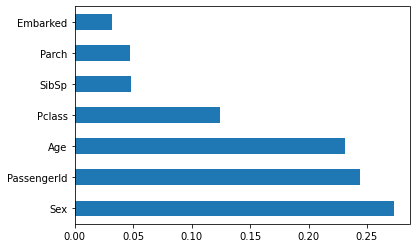

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Feature Importance using RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [29]:
clf = RandomForestClassifier(random_state=0,n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [30]:
feature_score = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_score)

PassengerId    0.265221
Sex            0.260662
Age            0.227282
Pclass         0.126745
SibSp          0.046604
Embarked       0.037518
Parch          0.035968
dtype: float64
